In [405]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Note: you may need to restart the kernel to use updated packages.


In [406]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [407]:
data=pd.read_csv('listings_dublin.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.291780,-6.257920,Private room,80.0,3,341,2024-06-12,2.11,2,117,47,NaN
1,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.292090,-6.256240,Private room,79.0,3,303,2024-06-11,1.90,2,51,52,NaN
2,159889,Friendly Single Room,766611,Marie,NaN,Dublin City,53.390270,-6.235470,Private room,55.0,2,433,2024-06-12,2.90,3,303,43,NaN
3,162809,5.5 miles south of Dublin City :^),777681,Robbie,NaN,Dn Laoghaire-Rathdown,53.283260,-6.191880,Private room,NaN,2,388,2024-05-31,3.52,2,1,41,NaN
4,165828,Pádraig Pearse apt. Kilmainham,790601,Timothy,NaN,Dublin City,53.337440,-6.323630,Entire home/apt,221.0,3,76,2023-12-28,0.49,4,251,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,1180289066273857129,Comfortable room in Donnybrook,217266644,Carolina,NaN,Dublin City,53.319463,-6.238002,Private room,60.0,1,0,NaN,NaN,3,103,0,NaN
5800,1180315525621033889,Seaview,4984768,Kellie,NaN,Fingal,53.372680,-6.095731,Private room,120.0,1,1,2024-06-17,1.00,1,194,1,NaN
5801,1180375757422977015,Booterstown 2 Bed 2 Bath Apt,187996928,Dylan,NaN,Dn Laoghaire-Rathdown,53.300464,-6.204688,Private room,159.0,1,0,NaN,NaN,1,269,0,NaN
5802,1180446584237197893,Portmarnock by the sea,583832615,Mairead,NaN,Dublin City,53.317820,-6.205020,Private room,87.0,1,0,NaN,NaN,2,253,0,NaN


In [408]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               5804
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              642
minimum_nights                       0
number_of_reviews                    0
last_review                       1066
reviews_per_month                 1066
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5804
dtype: int64

In [409]:
data.dtypes
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [410]:
dfsinnulos = data.fillna(method="ffill")
df_dublin = dfsinnulos.fillna(method="bfill")


/var/folders/b8/jg1xymvs3lsflq9qyj030f0m0000gp/T/ipykernel_33013/2392320827.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfsinnulos = data.fillna(method="ffill")
/var/folders/b8/jg1xymvs3lsflq9qyj030f0m0000gp/T/ipykernel_33013/2392320827.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_dublin = dfsinnulos.fillna(method="bfill")


In [411]:
df_dublin = df_dublin.drop(["neighbourhood_group", "license"], axis=1)
df_dublin


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,Dn Laoghaire-Rathdown,53.291780,-6.257920,Private room,80.0,3,341,2024-06-12,2.11,2,117,47
1,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,Dn Laoghaire-Rathdown,53.292090,-6.256240,Private room,79.0,3,303,2024-06-11,1.90,2,51,52
2,159889,Friendly Single Room,766611,Marie,Dublin City,53.390270,-6.235470,Private room,55.0,2,433,2024-06-12,2.90,3,303,43
3,162809,5.5 miles south of Dublin City :^),777681,Robbie,Dn Laoghaire-Rathdown,53.283260,-6.191880,Private room,55.0,2,388,2024-05-31,3.52,2,1,41
4,165828,Pádraig Pearse apt. Kilmainham,790601,Timothy,Dublin City,53.337440,-6.323630,Entire home/apt,221.0,3,76,2023-12-28,0.49,4,251,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,1180289066273857129,Comfortable room in Donnybrook,217266644,Carolina,Dublin City,53.319463,-6.238002,Private room,60.0,1,0,2024-06-12,1.00,3,103,0
5800,1180315525621033889,Seaview,4984768,Kellie,Fingal,53.372680,-6.095731,Private room,120.0,1,1,2024-06-17,1.00,1,194,1
5801,1180375757422977015,Booterstown 2 Bed 2 Bath Apt,187996928,Dylan,Dn Laoghaire-Rathdown,53.300464,-6.204688,Private room,159.0,1,0,2024-06-17,1.00,1,269,0
5802,1180446584237197893,Portmarnock by the sea,583832615,Mairead,Dublin City,53.317820,-6.205020,Private room,87.0,1,0,2024-06-17,1.00,2,253,0


In [412]:
#Corroboramos valores nulos
valores_nulos=df_dublin.isnull().sum()
valores_nulos

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [413]:
data2=pd.read_csv('listings_sidney.csv')
data2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3670285,Beach Apartment,18619513,Simon,NaN,Manly,-33.786320,151.283210,Entire home/apt,185.0,90,0,NaN,NaN,1,78,0,NaN
1,8461058,Modern home in leafy parkland. Bedroom 1,44539333,Robyn,NaN,Ryde,-33.797830,151.156070,Private room,100.0,1,99,2024-04-08,0.94,2,33,11,PID-STRA-7366
2,8461067,Modern Home in Leafy Parkland. Bedroom 2.,44539333,Robyn,NaN,Ryde,-33.797820,151.155610,Private room,100.0,1,37,2024-01-05,0.36,2,8,6,PID-STRA-7366
3,28227371,MANLY BEACH HOME ArtDeco+Private Alfresco+Garden,13807525,Elise,NaN,Manly,-33.788420,151.283360,Entire home/apt,347.0,2,205,2024-06-02,3.03,1,324,45,Exempt
4,28230435,Manly: Beautiful 3 Bedroom apt with stunning v...,161919115,Henrietta,NaN,Manly,-33.801490,151.290530,Entire home/apt,736.0,5,43,2024-05-10,0.62,1,135,18,PID-STRA-14682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15543,1175255326977211288,Rhodes 2 Bedroom Walker St,474241925,Lucy,NaN,Canada Bay,-33.826279,151.087875,Entire home/apt,217.0,1,0,NaN,NaN,40,216,0,Exempt
15544,1175275631576074509,Zetland 1 Bedroom George Julius Ave,474241925,Lucy,NaN,Sydney,-33.908987,151.209692,Entire home/apt,135.0,1,0,NaN,NaN,40,266,0,Exempt
15545,1175332750218467703,Zetland 2 Bedroom Paul St,474241925,Lucy,NaN,Sydney,-33.909123,151.203699,Entire home/apt,176.0,1,0,NaN,NaN,40,241,0,Exempt
15546,1175515304468322455,"Waves of Calm, Tamarama Isyd",7409213,L'Abode Accommodation Specialist,NaN,Waverley,-33.895940,151.269130,Entire home/apt,570.0,1,0,NaN,NaN,144,343,0,PID-STRA-67136


In [414]:
#Corroboramos valores nulos
valores_nulos=data2.isnull().sum()
valores_nulos

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               15548
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                               949
minimum_nights                        0
number_of_reviews                     0
last_review                        2906
reviews_per_month                  2906
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                            1504
dtype: int64

In [415]:
data2.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [416]:
dfsinnulos2 = data2.fillna(method="ffill")
df_sidney = dfsinnulos2.fillna(method="bfill")

/var/folders/b8/jg1xymvs3lsflq9qyj030f0m0000gp/T/ipykernel_33013/2844816953.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfsinnulos2 = data2.fillna(method="ffill")
/var/folders/b8/jg1xymvs3lsflq9qyj030f0m0000gp/T/ipykernel_33013/2844816953.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sidney = dfsinnulos2.fillna(method="bfill")


In [417]:
df_sidney = df_sidney.drop(["neighbourhood_group"], axis=1)


In [418]:
#Corroboramos valores nulos
valores_nulos=df_sidney.isnull().sum()
valores_nulos

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [419]:
#data1.to_csv("Baselimpia-dublin.csv")
#data3.to_csv("Baselimpia-sydney.csv")

**Outliers**

<Figure size 1500x800 with 0 Axes>

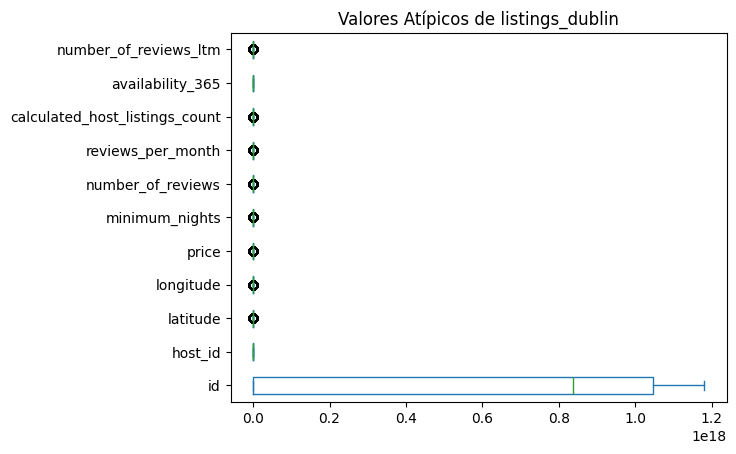

In [420]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_dublin.plot(kind='box', vert=False)
plt.title("Valores Atípicos de listings_dublin")
plt.show() #dibujamos el diagrama

<Figure size 1500x800 with 0 Axes>

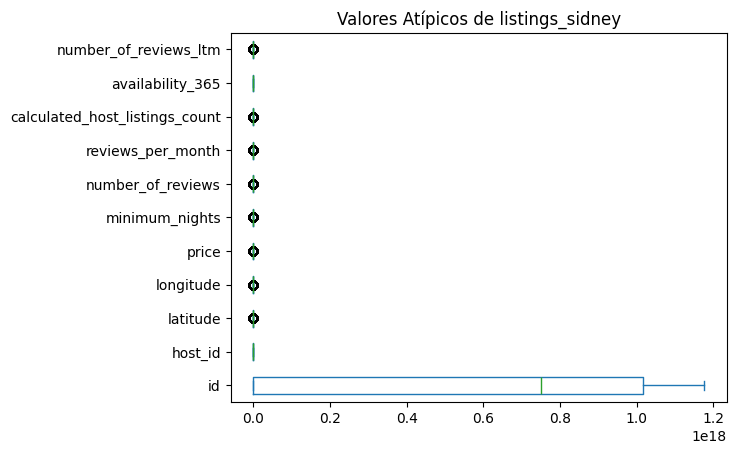

In [421]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_sidney.plot(kind='box', vert=False)
plt.title("Valores Atípicos de listings_sidney")
plt.show() #dibujamos el diagrama

**Outliers Dublin**

In [422]:
df_dublin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5804 entries, 0 to 5803
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5804 non-null   int64  
 1   name                            5804 non-null   object 
 2   host_id                         5804 non-null   int64  
 3   host_name                       5804 non-null   object 
 4   neighbourhood                   5804 non-null   object 
 5   latitude                        5804 non-null   float64
 6   longitude                       5804 non-null   float64
 7   room_type                       5804 non-null   object 
 8   price                           5804 non-null   float64
 9   minimum_nights                  5804 non-null   int64  
 10  number_of_reviews               5804 non-null   int64  
 11  last_review                     5804 non-null   object 
 12  reviews_per_month               58

In [423]:
cualitativas_dublin= df_dublin.iloc[ : , [0,1,2,3,4,7,11]]
cualitativas_dublin

,id,name,host_id,host_name,neighbourhood,room_type,last_review
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,Dn Laoghaire-Rathdown,Private room,2024-06-12
1,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,Dn Laoghaire-Rathdown,Private room,2024-06-11
2,159889,Friendly Single Room,766611,Marie,Dublin City,Private room,2024-06-12
3,162809,5.5 miles south of Dublin City :^),777681,Robbie,Dn Laoghaire-Rathdown,Private room,2024-05-31
4,165828,Pádraig Pearse apt. Kilmainham,790601,Timothy,Dublin City,Entire home/apt,2023-12-28
...,...,...,...,...,...,...,...
5799,1180289066273857129,Comfortable room in Donnybrook,217266644,Carolina,Dublin City,Private room,2024-06-12
5800,1180315525621033889,Seaview,4984768,Kellie,Fingal,Private room,2024-06-17
5801,1180375757422977015,Booterstown 2 Bed 2 Bath Apt,187996928,Dylan,Dn Laoghaire-Rathdown,Private room,2024-06-17
5802,1180446584237197893,Portmarnock by the sea,583832615,Mairead,Dublin City,Private room,2024-06-17


In [424]:
cuantitativas_dublin= df_dublin.iloc[ : , [5,6,8,9,10,12,13,14,15]]
cuantitativas_dublin

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,53.291780,-6.257920,80.0,3,341,2.11,2,117,47
1,53.292090,-6.256240,79.0,3,303,1.90,2,51,52
2,53.390270,-6.235470,55.0,2,433,2.90,3,303,43
3,53.283260,-6.191880,55.0,2,388,3.52,2,1,41
4,53.337440,-6.323630,221.0,3,76,0.49,4,251,1
...,...,...,...,...,...,...,...,...,...
5799,53.319463,-6.238002,60.0,1,0,1.00,3,103,0
5800,53.372680,-6.095731,120.0,1,1,1.00,1,194,1
5801,53.300464,-6.204688,159.0,1,0,1.00,1,269,0
5802,53.317820,-6.205020,87.0,1,0,1.00,2,253,0


<Figure size 1500x800 with 0 Axes>

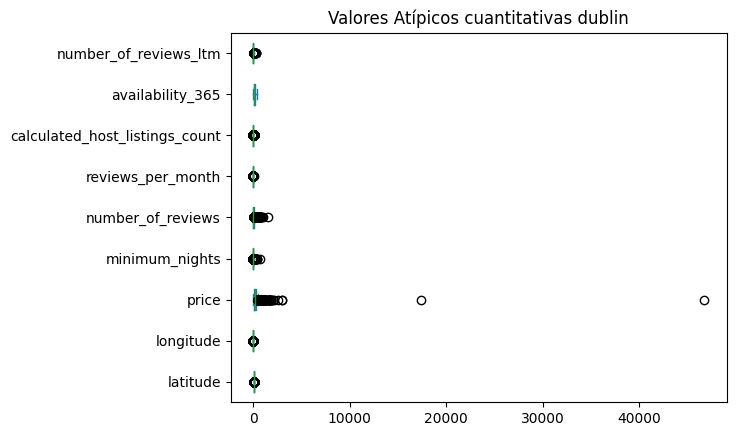

In [425]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas_dublin.plot(kind='box', vert=False)
plt.title("Valores Atípicos cuantitativas dublin")
plt.show() #dibujamos el diagrama

In [426]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuantitativas_dublin
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido latitude                            53.502945
longitude                           -6.050503
price                             2233.362877
minimum_nights                      58.816256
number_of_reviews                  311.652882
reviews_per_month                    8.199949
calculated_host_listings_count      51.345002
availability_365                   462.927255
number_of_reviews_ltm               79.493918
dtype: float64
Limite inferior permitido latitude                            53.193305
longitude                           -6.464088
price                            -1824.085482
minimum_nights                     -48.356228
number_of_reviews                 -223.853434
reviews_per_month                   -4.308794
calculated_host_listings_count     -37.489730
availability_365                  -202.325601
number_of_reviews_ltm              -52.141748
dtype: float64


In [427]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
outliersdata1= cuantitativas_dublin[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliersdata1

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,53.291780,-6.257920,80.0,3.0,NaN,2.11,2.0,117,47.0
1,53.292090,-6.256240,79.0,3.0,303.0,1.90,2.0,51,52.0
2,53.390270,-6.235470,55.0,2.0,NaN,2.90,3.0,303,43.0
3,53.283260,-6.191880,55.0,2.0,NaN,3.52,2.0,1,41.0
4,53.337440,-6.323630,221.0,3.0,76.0,0.49,4.0,251,1.0
...,...,...,...,...,...,...,...,...,...
5799,53.319463,-6.238002,60.0,1.0,0.0,1.00,3.0,103,0.0
5800,53.372680,-6.095731,120.0,1.0,1.0,1.00,1.0,194,1.0
5801,53.300464,-6.204688,159.0,1.0,0.0,1.00,1.0,269,0.0
5802,53.317820,-6.205020,87.0,1.0,0.0,1.00,2.0,253,0.0


In [428]:
#Corroboramos valores nulos del dataframe
valores_nulosdata1=outliersdata1.isnull().sum()
valores_nulosdata1

latitude                          134
longitude                          43
price                               5
minimum_nights                     53
number_of_reviews                 139
reviews_per_month                  97
calculated_host_listings_count    211
availability_365                    0
number_of_reviews_ltm             114
dtype: int64

In [429]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_cleandata1=outliersdata1.copy()
data_cleandata1=data_cleandata1.fillna(round(outliersdata1.mean(),1))
data_cleandata1

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,53.291780,-6.257920,80.0,3.0,33.5,2.11,2.0,117,47.0
1,53.292090,-6.256240,79.0,3.0,303.0,1.90,2.0,51,52.0
2,53.390270,-6.235470,55.0,2.0,33.5,2.90,3.0,303,43.0
3,53.283260,-6.191880,55.0,2.0,33.5,3.52,2.0,1,41.0
4,53.337440,-6.323630,221.0,3.0,76.0,0.49,4.0,251,1.0
...,...,...,...,...,...,...,...,...,...
5799,53.319463,-6.238002,60.0,1.0,0.0,1.00,3.0,103,0.0
5800,53.372680,-6.095731,120.0,1.0,1.0,1.00,1.0,194,1.0
5801,53.300464,-6.204688,159.0,1.0,0.0,1.00,1.0,269,0.0
5802,53.317820,-6.205020,87.0,1.0,0.0,1.00,2.0,253,0.0


In [430]:
#Corroboramos valores nulos del dataframe
valores_nulosdata1=data_cleandata1.isnull().sum()
valores_nulosdata1

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [431]:
Dublin = pd.concat([cualitativas_dublin,data_cleandata1], axis=1)
Dublin


,id,name,host_id,host_name,neighbourhood,room_type,last_review,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,Dn Laoghaire-Rathdown,Private room,2024-06-12,53.291780,-6.257920,80.0,3.0,33.5,2.11,2.0,117,47.0
1,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,Dn Laoghaire-Rathdown,Private room,2024-06-11,53.292090,-6.256240,79.0,3.0,303.0,1.90,2.0,51,52.0
2,159889,Friendly Single Room,766611,Marie,Dublin City,Private room,2024-06-12,53.390270,-6.235470,55.0,2.0,33.5,2.90,3.0,303,43.0
3,162809,5.5 miles south of Dublin City :^),777681,Robbie,Dn Laoghaire-Rathdown,Private room,2024-05-31,53.283260,-6.191880,55.0,2.0,33.5,3.52,2.0,1,41.0
4,165828,Pádraig Pearse apt. Kilmainham,790601,Timothy,Dublin City,Entire home/apt,2023-12-28,53.337440,-6.323630,221.0,3.0,76.0,0.49,4.0,251,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,1180289066273857129,Comfortable room in Donnybrook,217266644,Carolina,Dublin City,Private room,2024-06-12,53.319463,-6.238002,60.0,1.0,0.0,1.00,3.0,103,0.0
5800,1180315525621033889,Seaview,4984768,Kellie,Fingal,Private room,2024-06-17,53.372680,-6.095731,120.0,1.0,1.0,1.00,1.0,194,1.0
5801,1180375757422977015,Booterstown 2 Bed 2 Bath Apt,187996928,Dylan,Dn Laoghaire-Rathdown,Private room,2024-06-17,53.300464,-6.204688,159.0,1.0,0.0,1.00,1.0,269,0.0
5802,1180446584237197893,Portmarnock by the sea,583832615,Mairead,Dublin City,Private room,2024-06-17,53.317820,-6.205020,87.0,1.0,0.0,1.00,2.0,253,0.0


**Outliers Sidney**

In [432]:
df_sidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15548 entries, 0 to 15547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15548 non-null  int64  
 1   name                            15548 non-null  object 
 2   host_id                         15548 non-null  int64  
 3   host_name                       15548 non-null  object 
 4   neighbourhood                   15548 non-null  object 
 5   latitude                        15548 non-null  float64
 6   longitude                       15548 non-null  float64
 7   room_type                       15548 non-null  object 
 8   price                           15548 non-null  float64
 9   minimum_nights                  15548 non-null  int64  
 10  number_of_reviews               15548 non-null  int64  
 11  last_review                     15548 non-null  object 
 12  reviews_per_month               

In [433]:
cualitativas_sidney= df_sidney.iloc[ : , [0,1,2,3,4,7,11,16]]  

In [434]:
cuantitativas_sidney= df_sidney.iloc[ : , [5,6,8,9,10,12,13,14,15]] 

<Figure size 1500x800 with 0 Axes>

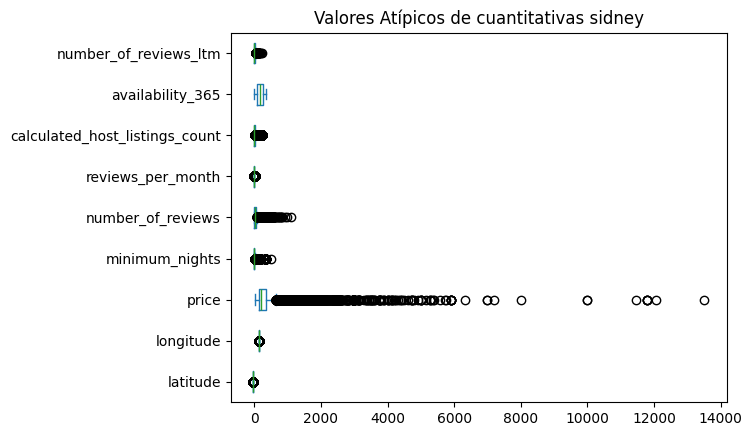

In [435]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas_sidney.plot(kind='box', vert=False)
plt.title("Valores Atípicos de cuantitativas sidney")
plt.show() #dibujamos el diagrama

In [436]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuantitativas_sidney
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido latitude                           -33.572749
longitude                          151.523345
price                             1998.252959
minimum_nights                     120.489408
number_of_reviews                  235.153841
reviews_per_month                    5.838165
calculated_host_listings_count     126.066146
availability_365                   523.595622
number_of_reviews_ltm               57.949238
dtype: float64
Limite inferior permitido latitude                           -34.123663
longitude                          150.833496
price                            -1301.392141
minimum_nights                     -87.304690
number_of_reviews                 -165.581806
reviews_per_month                   -2.856722
calculated_host_listings_count     -91.634194
availability_365                  -176.787930
number_of_reviews_ltm              -36.010596
dtype: float64


In [437]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
outliersdata3= cuantitativas_sidney[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliersdata3

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,-33.786320,151.283210,185.0,90.0,0.0,0.94,1.0,78,0.0
1,-33.797830,151.156070,100.0,1.0,99.0,0.94,2.0,33,11.0
2,-33.797820,151.155610,100.0,1.0,37.0,0.36,2.0,8,6.0
3,-33.788420,151.283360,347.0,2.0,205.0,3.03,1.0,324,45.0
4,-33.801490,151.290530,736.0,5.0,43.0,0.62,1.0,135,18.0
...,...,...,...,...,...,...,...,...,...
15543,-33.826279,151.087875,217.0,1.0,0.0,1.00,40.0,216,0.0
15544,-33.908987,151.209692,135.0,1.0,0.0,1.00,40.0,266,0.0
15545,-33.909123,151.203699,176.0,1.0,0.0,1.00,40.0,241,0.0
15546,-33.895940,151.269130,570.0,1.0,0.0,1.00,NaN,343,0.0


In [438]:
#Corroboramos valores nulos del dataframe
valores_nulosdata3=outliersdata3.isnull().sum()
valores_nulosdata3

latitude                           97
longitude                         357
price                             286
minimum_nights                     72
number_of_reviews                 368
reviews_per_month                 246
calculated_host_listings_count    496
availability_365                    0
number_of_reviews_ltm             325
dtype: int64

In [439]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_cleandata3=outliersdata3.copy()
data_cleandata3=data_cleandata3.fillna(round(outliersdata3.mean(),1))
data_cleandata3

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,-33.786320,151.283210,185.0,90.0,0.0,0.94,1.0,78,0.0
1,-33.797830,151.156070,100.0,1.0,99.0,0.94,2.0,33,11.0
2,-33.797820,151.155610,100.0,1.0,37.0,0.36,2.0,8,6.0
3,-33.788420,151.283360,347.0,2.0,205.0,3.03,1.0,324,45.0
4,-33.801490,151.290530,736.0,5.0,43.0,0.62,1.0,135,18.0
...,...,...,...,...,...,...,...,...,...
15543,-33.826279,151.087875,217.0,1.0,0.0,1.00,40.0,216,0.0
15544,-33.908987,151.209692,135.0,1.0,0.0,1.00,40.0,266,0.0
15545,-33.909123,151.203699,176.0,1.0,0.0,1.00,40.0,241,0.0
15546,-33.895940,151.269130,570.0,1.0,0.0,1.00,12.1,343,0.0


In [440]:
#Corroboramos valores nulos del dataframe
valores_nulosdata3=data_cleandata3.isnull().sum()
valores_nulosdata3

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [441]:
sidney = pd.concat([cualitativas_sidney,data_cleandata3], axis=1)
sidney

,id,name,host_id,host_name,neighbourhood,room_type,last_review,license,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,3670285,Beach Apartment,18619513,Simon,Manly,Entire home/apt,2024-04-08,PID-STRA-7366,-33.786320,151.283210,185.0,90.0,0.0,0.94,1.0,78,0.0
1,8461058,Modern home in leafy parkland. Bedroom 1,44539333,Robyn,Ryde,Private room,2024-04-08,PID-STRA-7366,-33.797830,151.156070,100.0,1.0,99.0,0.94,2.0,33,11.0
2,8461067,Modern Home in Leafy Parkland. Bedroom 2.,44539333,Robyn,Ryde,Private room,2024-01-05,PID-STRA-7366,-33.797820,151.155610,100.0,1.0,37.0,0.36,2.0,8,6.0
3,28227371,MANLY BEACH HOME ArtDeco+Private Alfresco+Garden,13807525,Elise,Manly,Entire home/apt,2024-06-02,Exempt,-33.788420,151.283360,347.0,2.0,205.0,3.03,1.0,324,45.0
4,28230435,Manly: Beautiful 3 Bedroom apt with stunning v...,161919115,Henrietta,Manly,Entire home/apt,2024-05-10,PID-STRA-14682,-33.801490,151.290530,736.0,5.0,43.0,0.62,1.0,135,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15543,1175255326977211288,Rhodes 2 Bedroom Walker St,474241925,Lucy,Canada Bay,Entire home/apt,2024-06-10,Exempt,-33.826279,151.087875,217.0,1.0,0.0,1.00,40.0,216,0.0
15544,1175275631576074509,Zetland 1 Bedroom George Julius Ave,474241925,Lucy,Sydney,Entire home/apt,2024-06-10,Exempt,-33.908987,151.209692,135.0,1.0,0.0,1.00,40.0,266,0.0
15545,1175332750218467703,Zetland 2 Bedroom Paul St,474241925,Lucy,Sydney,Entire home/apt,2024-06-10,Exempt,-33.909123,151.203699,176.0,1.0,0.0,1.00,40.0,241,0.0
15546,1175515304468322455,"Waves of Calm, Tamarama Isyd",7409213,L'Abode Accommodation Specialist,Waverley,Entire home/apt,2024-06-10,PID-STRA-67136,-33.895940,151.269130,570.0,1.0,0.0,1.00,12.1,343,0.0


**Análisis univariado barrios**

In [442]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(Dublin)

                                                   name  frequency  \
0                                            Grange Two          9   
1                            Fernbank by Dublin At Home          7   
2                            The Hunt by Dublin At Home          6   
3                            montebello house - Sleeps2          6   
4                                Apartment in Dublin 01          5   
...                                                 ...        ...   
5634      Beautiful detached home in Ranelagh, Dublin 6          1   
5635  Bed + Breakfast in shared apartment at Grand C...          1   
5636    Private room with breakfast, tv & free parking!          1   
5637   Bed in a shared upstairs 4 bed FEMALE ONLY room.          1   
5638                            Portmarnock by the Sea!          1   

      percentage  cumulative_perc  
0       0.001551         0.001551  
1       0.001206         0.002757  
2       0.001034         0.003790  
3       0.00103

In [443]:
Dublin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5804 entries, 0 to 5803
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5804 non-null   int64  
 1   name                            5804 non-null   object 
 2   host_id                         5804 non-null   int64  
 3   host_name                       5804 non-null   object 
 4   neighbourhood                   5804 non-null   object 
 5   room_type                       5804 non-null   object 
 6   last_review                     5804 non-null   object 
 7   latitude                        5804 non-null   float64
 8   longitude                       5804 non-null   float64
 9   price                           5804 non-null   float64
 10  minimum_nights                  5804 non-null   float64
 11  number_of_reviews               5804 non-null   float64
 12  reviews_per_month               58

In [444]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Dublin['neighbourhood'])
table1

,neighbourhood,frequency,percentage,cumulative_perc
0,Dublin City,3999,0.689008,0.689008
1,Fingal,708,0.121985,0.810992
2,Dn Laoghaire-Rathdown,699,0.120434,0.931427
3,South Dublin,398,0.068573,1.000000


In [445]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>500]
Filtro1

,neighbourhood,frequency,percentage,cumulative_perc
0,Dublin City,3999,0.689008,0.689008
1,Fingal,708,0.121985,0.810992
2,Dn Laoghaire-Rathdown,699,0.120434,0.931427


In [446]:
#Ajusto el indice de mi dataframe
Filtro_index1= Filtro1.set_index('neighbourhood')
Filtro_index1

,frequency,percentage,cumulative_perc
neighbourhood,,,
Dublin City,3999,0.689008,0.689008
Fingal,708,0.121985,0.810992
Dn Laoghaire-Rathdown,699,0.120434,0.931427


In [447]:
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency1= Filtro_index1.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency1

,frequency
neighbourhood,
Dublin City,3999
Fingal,708
Dn Laoghaire-Rathdown,699


Text(0, 0.5, 'Frecuencia')

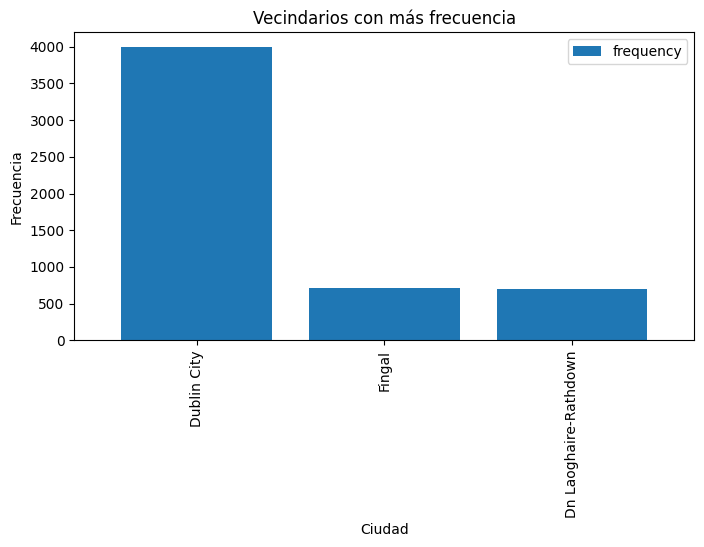

In [448]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency1.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('Vecindarios con más frecuencia')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

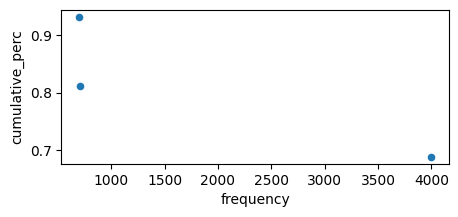

In [449]:
Filtro_index1.plot("frequency","cumulative_perc", kind="scatter", figsize=(5,2))

<Axes: xlabel='neighbourhood'>

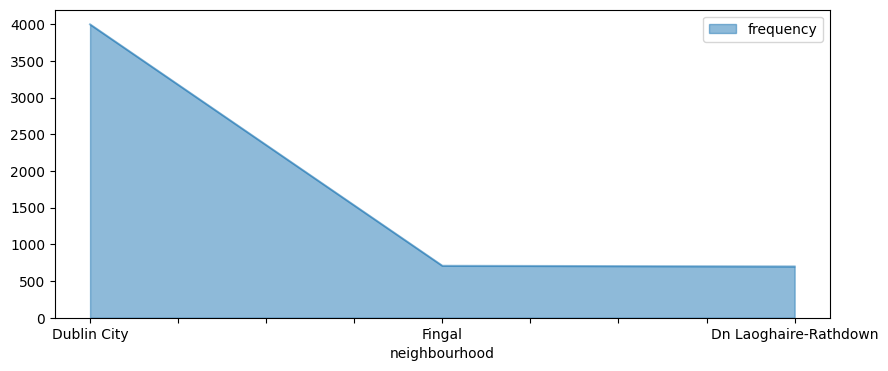

In [450]:
Filtro_index_frequency1.plot(kind='area', figsize=(10,4), alpha = 0.5)

<Axes: ylabel='frequency'>

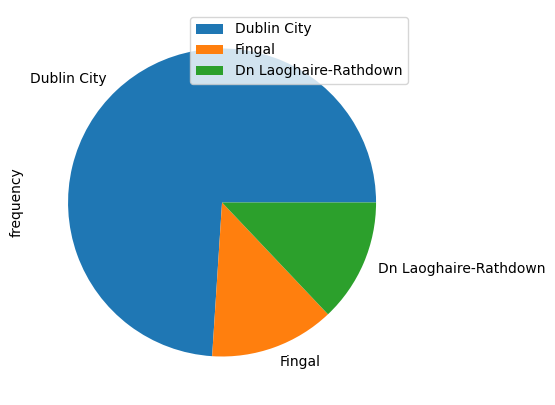

In [451]:
Filtro_index_frequency1.plot(kind='pie', y='frequency', figsize=(5,5))


**Ciudad 2**

In [452]:
sidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15548 entries, 0 to 15547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15548 non-null  int64  
 1   name                            15548 non-null  object 
 2   host_id                         15548 non-null  int64  
 3   host_name                       15548 non-null  object 
 4   neighbourhood                   15548 non-null  object 
 5   room_type                       15548 non-null  object 
 6   last_review                     15548 non-null  object 
 7   license                         15548 non-null  object 
 8   latitude                        15548 non-null  float64
 9   longitude                       15548 non-null  float64
 10  price                           15548 non-null  float64
 11  minimum_nights                  15548 non-null  float64
 12  number_of_reviews               

In [453]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(sidney)

                                                    name  frequency  \
0                               Motel Style Ensuite Room          8   
1      1-BR Retreat Near Auburn Hospital & Vibrant Arena          7   
2       Cozy Private Queen Room - Near Transport & Shops          6   
3         Serene Double Room - Close to Stations & Shops          6   
4      Tranquil Double Room - Next to Bus Station & Park          5   
...                                                  ...        ...   
15220     Beautiful Beach House in  the Freshwater Basin          1   
15221  Affordable Double rooms near The Star Casino &...          1   
15222           Ocean Views - 2 bedroom unit with a pool          1   
15223                             Sydney Harbour Cottage          1   
15224                                 Studio 2/2 Swan St          1   

       percentage  cumulative_perc  
0        0.000515         0.000515  
1        0.000450         0.000965  
2        0.000386         0.001351  

In [454]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(sidney['neighbourhood'])
table2

,neighbourhood,frequency,percentage,cumulative_perc
0,Sydney,3337,0.214626,0.214626
1,Waverley,1443,0.092809,0.307435
2,Pittwater,907,0.058335,0.365771
3,Randwick,893,0.057435,0.423206
4,Warringah,810,0.052097,0.475302
5,Manly,715,0.045987,0.521289
6,North Sydney,630,0.040520,0.561809
7,Woollahra,497,0.031966,0.593774
8,Sutherland Shire,416,0.026756,0.620530
9,Marrickville,415,0.026692,0.647222


In [455]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro2= table2[table2['frequency']>700]
Filtro2

,neighbourhood,frequency,percentage,cumulative_perc
0,Sydney,3337,0.214626,0.214626
1,Waverley,1443,0.092809,0.307435
2,Pittwater,907,0.058335,0.365771
3,Randwick,893,0.057435,0.423206
4,Warringah,810,0.052097,0.475302
5,Manly,715,0.045987,0.521289


In [456]:
#Ajusto el indice de mi dataframe
Filtro_index1= Filtro2.set_index('neighbourhood')
Filtro_index1

,frequency,percentage,cumulative_perc
neighbourhood,,,
Sydney,3337,0.214626,0.214626
Waverley,1443,0.092809,0.307435
Pittwater,907,0.058335,0.365771
Randwick,893,0.057435,0.423206
Warringah,810,0.052097,0.475302
Manly,715,0.045987,0.521289


In [457]:
#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency1= Filtro_index1.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency1

,frequency
neighbourhood,
Sydney,3337
Waverley,1443
Pittwater,907
Randwick,893
Warringah,810
Manly,715


Text(0, 0.5, 'Frecuencia')

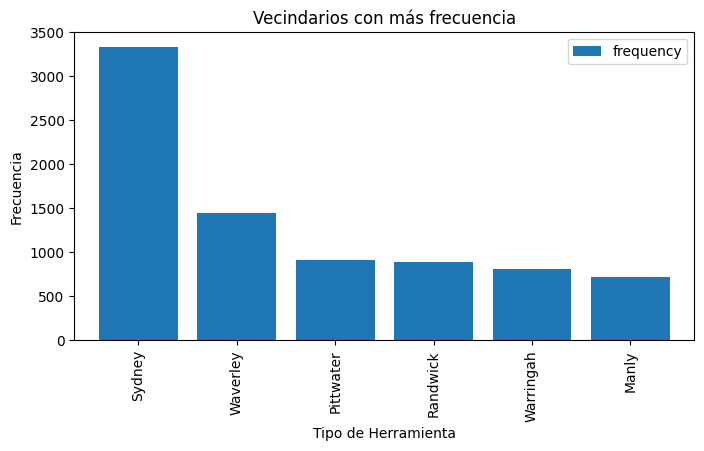

In [458]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index_frequency1.plot(kind = 'bar', width=0.8, figsize=(8,4))
plt.title('Vecindarios con más frecuencia')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

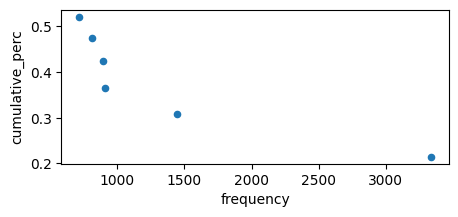

In [459]:
Filtro_index1.plot("frequency","cumulative_perc", kind="scatter", figsize=(5,2))

<Axes: xlabel='neighbourhood'>

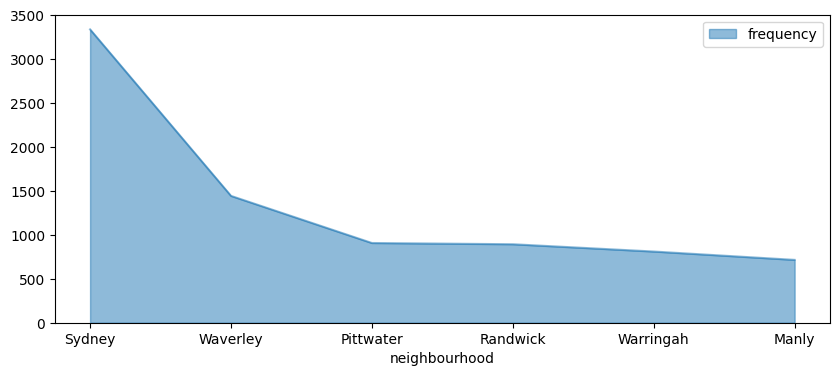

In [460]:
Filtro_index_frequency1.plot(kind='area', figsize=(10,4), alpha = 0.5)

<Axes: ylabel='frequency'>

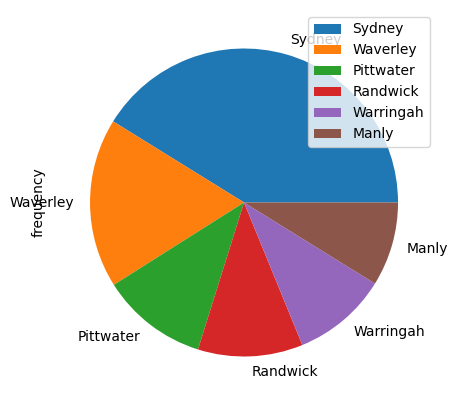

In [461]:
Filtro_index_frequency1.plot(kind='pie', y='frequency', figsize=(5,5))



**VARIABLE**

In [462]:
Dublin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5804 entries, 0 to 5803
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5804 non-null   int64  
 1   name                            5804 non-null   object 
 2   host_id                         5804 non-null   int64  
 3   host_name                       5804 non-null   object 
 4   neighbourhood                   5804 non-null   object 
 5   room_type                       5804 non-null   object 
 6   last_review                     5804 non-null   object 
 7   latitude                        5804 non-null   float64
 8   longitude                       5804 non-null   float64
 9   price                           5804 non-null   float64
 10  minimum_nights                  5804 non-null   float64
 11  number_of_reviews               5804 non-null   float64
 12  reviews_per_month               58

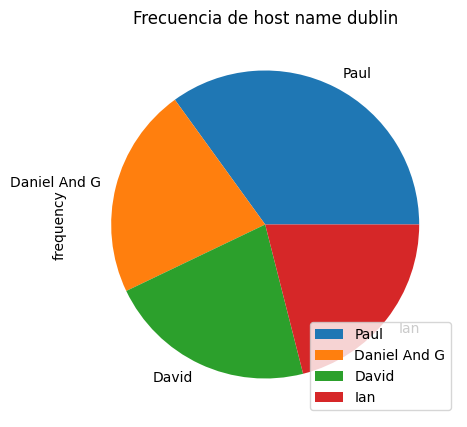

In [463]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(Dublin['host_name'])
table3
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro3= table3[table3['frequency']>70]
Filtro3

#Ajusto el indice de mi dataframe
Filtro_index1= Filtro3.set_index('host_name')
Filtro_index1

#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency1= Filtro_index1.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency1

Filtro_index_frequency1.plot(kind='pie', y='frequency', figsize=(5,5))
plt.title("Frecuencia de host name dublin")  # Agrega el título
plt.show()

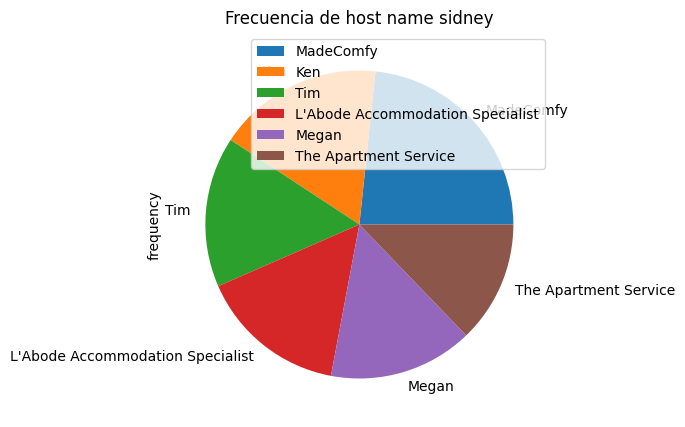

In [464]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(sidney['host_name'])
table4
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro4= table4[table4['frequency']>100]
Filtro4

#Ajusto el indice de mi dataframe
Filtro_index1= Filtro4.set_index('host_name')
Filtro_index1

#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency1= Filtro_index1.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency1

Filtro_index_frequency1.plot(kind='pie', y='frequency', figsize=(5,5))
plt.title("Frecuencia de host name sidney")  # Agrega el título
plt.show()

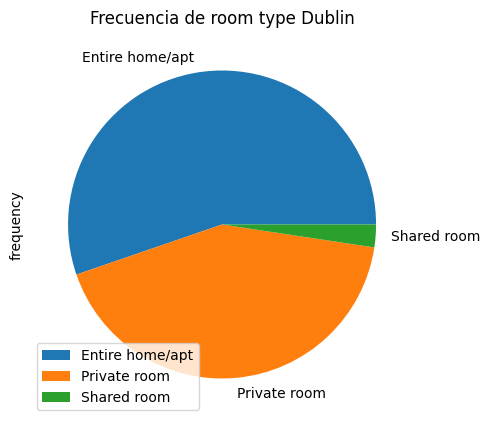

In [465]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(Dublin['room_type'])
table5
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro5= table5[table5['frequency']>100]
Filtro5

#Ajusto el indice de mi dataframe
Filtro_index1= Filtro5.set_index('room_type')
Filtro_index1

#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency1= Filtro_index1.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency1

Filtro_index_frequency1.plot(kind='pie', y='frequency', figsize=(5,5))
plt.title("Frecuencia de room type Dublin")  # Agrega el título
plt.show()

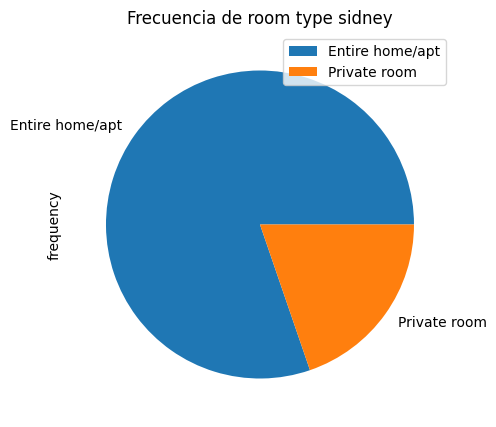

In [466]:
#Obtengo un análisis univariado de una variable categórica en específico
table6= freq_tbl(sidney['room_type'])
table6
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro6= table6[table6['frequency']>100]
Filtro6

#Ajusto el indice de mi dataframe
Filtro_index1= Filtro6.set_index('room_type')
Filtro_index1

#Elimino las columnas de "percentage" y "cumulative_perc"

Filtro_index_frequency1= Filtro_index1.drop(['percentage','cumulative_perc'], axis=1)
Filtro_index_frequency1

Filtro_index_frequency1.plot(kind='pie', y='frequency', figsize=(5,5))
plt.title("Frecuencia de room type sidney")  # Agrega el título
plt.show()

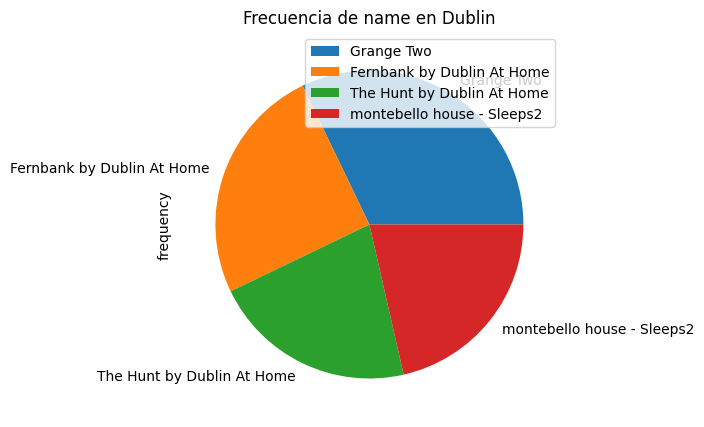

In [474]:
# Obtengo un análisis univariado de una variable categórica en específico
table7 = freq_tbl(Dublin['name'])
table7

# Obtengo un filtro de los valores más relevantes de la variable categórica seleccionada
Filtro7 = table7[table7['frequency'] > 5]
Filtro7

# Ajusto el índice de mi DataFrame
Filtro_index7 = Filtro7.set_index('name')
Filtro_index7

# Elimino las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency7 = Filtro_index7.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index_frequency7

# Graficar el gráfico de pastel
Filtro_index_frequency7.plot(kind='pie', y='frequency', figsize=(5,5))
plt.title("Frecuencia de name en Dublin")  # Agrega el título
plt.show()

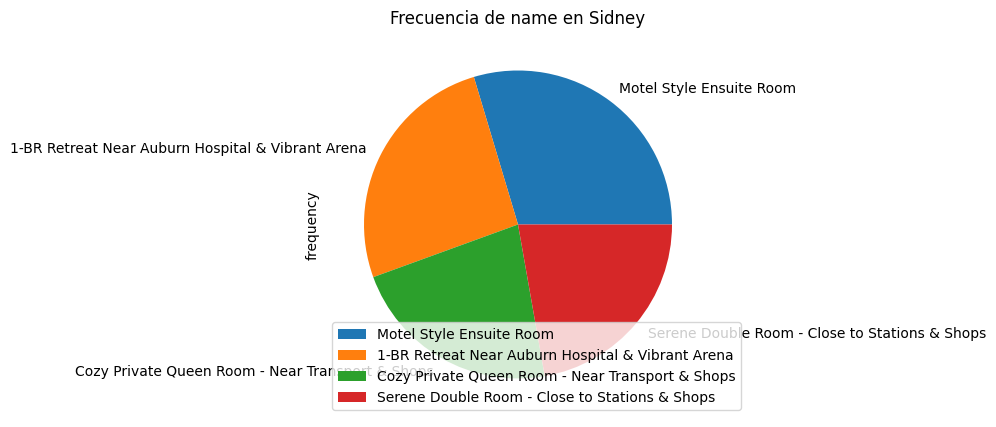

In [472]:
# Obtengo un análisis univariado de una variable categórica en específico
table7 = freq_tbl(sidney['name'])
table7

# Obtengo un filtro de los valores más relevantes de la variable categórica seleccionada
Filtro7 = table7[table7['frequency'] > 5]
Filtro7

# Ajusto el índice de mi DataFrame
Filtro_index7 = Filtro7.set_index('name')
Filtro_index7

# Elimino las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency7 = Filtro_index7.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index_frequency7

# Graficar el gráfico de pastel
Filtro_index_frequency7.plot(kind='pie', y='frequency', figsize=(5,5))
plt.title("Frecuencia de name en Sidney")  # Agrega el título
plt.show()


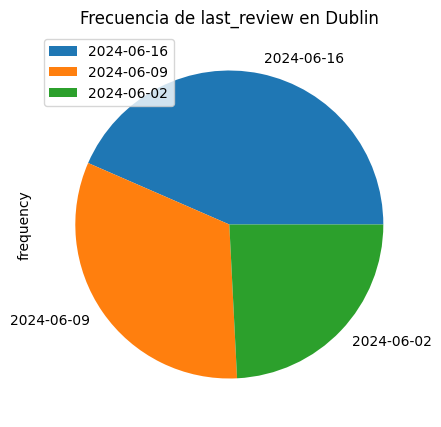

In [479]:
# Obtengo un análisis univariado de una variable categórica en específico
table8 = freq_tbl(Dublin['last_review'])
table8

# Obtengo un filtro de los valores más relevantes de la variable categórica seleccionada
Filtro8 = table8[table8['frequency'] > 200]
Filtro8

# Ajusto el índice de mi DataFrame
Filtro_index8 = Filtro8.set_index('last_review')
Filtro_index8

# Elimino las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency8 = Filtro_index8.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index_frequency8

# Graficar el gráfico de pastel
Filtro_index_frequency8.plot(kind='pie', y='frequency', figsize=(5,5))
plt.title("Frecuencia de last_review en Dublin")  # Agrega el título
plt.show()


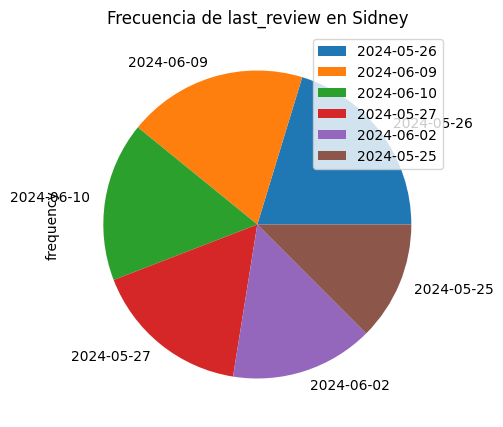

In [481]:
# Obtengo un análisis univariado de una variable categórica en específico
table8 = freq_tbl(sidney['last_review'])
table8

# Obtengo un filtro de los valores más relevantes de la variable categórica seleccionada
Filtro8 = table8[table8['frequency'] > 300]
Filtro8

# Ajusto el índice de mi DataFrame
Filtro_index8 = Filtro8.set_index('last_review')
Filtro_index8

# Elimino las columnas de "percentage" y "cumulative_perc"
Filtro_index_frequency8 = Filtro_index8.drop(['percentage', 'cumulative_perc'], axis=1)
Filtro_index_frequency8

# Graficar el gráfico de pastel
Filtro_index_frequency8.plot(kind='pie', y='frequency', figsize=(5,5))
plt.title("Frecuencia de last_review en Sidney")  # Agrega el título
plt.show()